In [1]:
import warnings

warnings.filterwarnings('ignore')


In [2]:
import numpy as np
import pandas as pd
!pip install tpot

from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score

import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
df = pd.read_csv("/content/transfusion.data")
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
print("Rows : ", df.shape[0],"\n")
print("Columns : ", df.shape[1])


Rows :  748 

Columns :  5


In [6]:
df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
df.rename(columns={'whether he/she donated blood in March 2007': 'target'},inplace=True)

df.head()


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


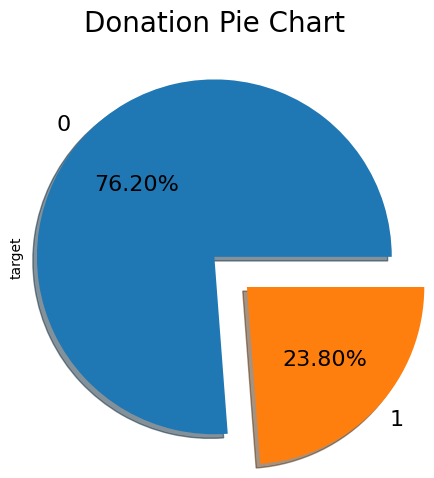

In [8]:
explode = [0,0.3] # To slice the perticuler section
textprops = {"fontsize":16} # Font size of text in pie chart

plt.title("Donation Pie Chart\n",{"fontsize":20})

df.target.value_counts(normalize=True).plot.pie(autopct = "%0.2f%%",explode = explode,textprops=textprops, shadow = True,radius = 1.2)


plt.show()

In [9]:
res = df[["Recency (months)","Frequency (times)","Monetary (c.c. blood)","Time (months)","target"]].corr(method = 'pearson')
res

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),target
Recency (months),1.000000,-0.182745,-0.182745,0.160618,-0.279869
Frequency (times),-0.182745,1.000000,1.000000,0.634940,0.218633
Monetary (c.c. blood),-0.182745,1.000000,1.000000,0.634940,0.218633
Time (months),0.160618,0.634940,0.634940,1.000000,-0.035854
target,-0.279869,0.218633,0.218633,-0.035854,1.000000


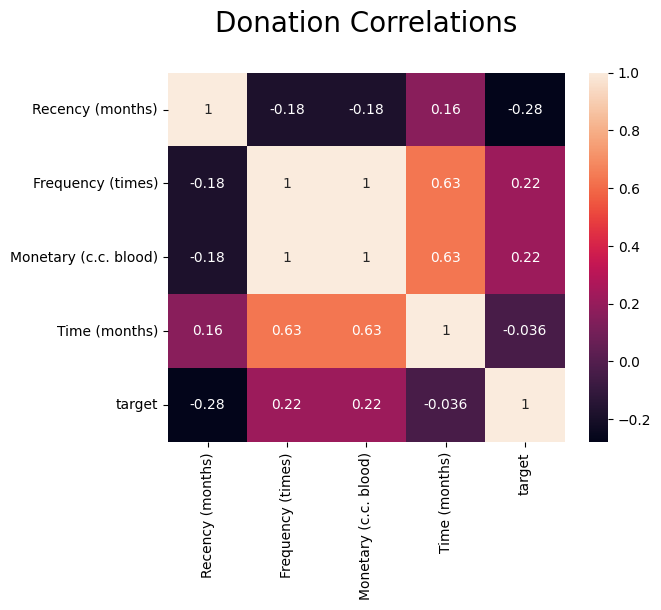

In [10]:
plt.title("Donation Correlations\n",{"fontsize":20})
sns.heatmap(res, annot=True)
plt.show()

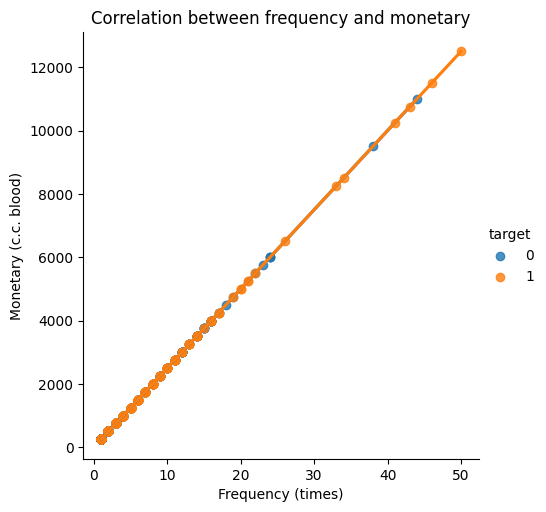

In [11]:
sns.lmplot(data=df,x='Frequency (times)',y='Monetary (c.c. blood)',hue='target')
plt.title("Correlation between frequency and monetary")

plt.show()

In [12]:
df["Recency (months)"].describe()


count    748.000000
mean       9.506684
std        8.095396
min        0.000000
25%        2.750000
50%        7.000000
75%       14.000000
max       74.000000
Name: Recency (months), dtype: float64

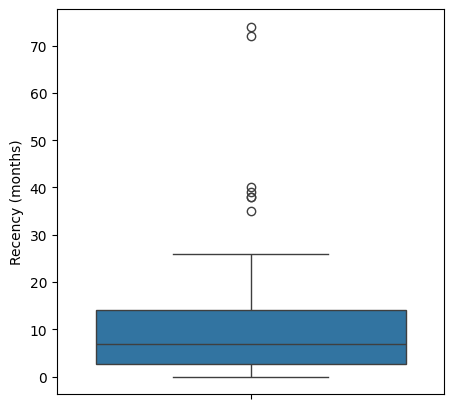

In [13]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y="Recency (months)")
plt.show()

In [14]:

df["Recency (months)"].quantile([0.5,0.7,0.9,0.95,0.99])

0.50     7.00
0.70    14.00
0.90    21.00
0.95    23.00
0.99    25.53
Name: Recency (months), dtype: float64

In [15]:
df = df[df['Recency (months)'] < np.nanpercentile(df['Recency (months)'], 99)]

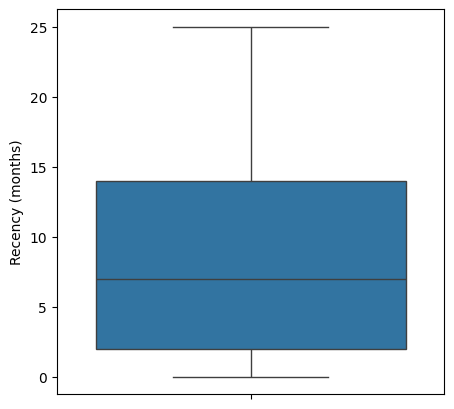

In [16]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y="Recency (months)")
plt.show()

In [17]:
df["Frequency (times)"].describe()

count    740.000000
mean       5.555405
std        5.855815
min        1.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       50.000000
Name: Frequency (times), dtype: float64

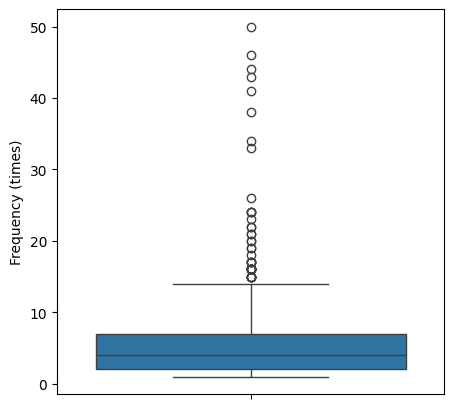

In [18]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y="Frequency (times)")
plt.show()


In [19]:
df["Frequency (times)"].quantile([0.5,0.7,0.9,0.95,0.99])


0.50     4.00
0.70     6.00
0.90    12.00
0.95    16.00
0.99    30.27
Name: Frequency (times), dtype: float64

In [20]:
df = df[df['Frequency (times)'] < np.nanpercentile(df['Frequency (times)'], 99)]


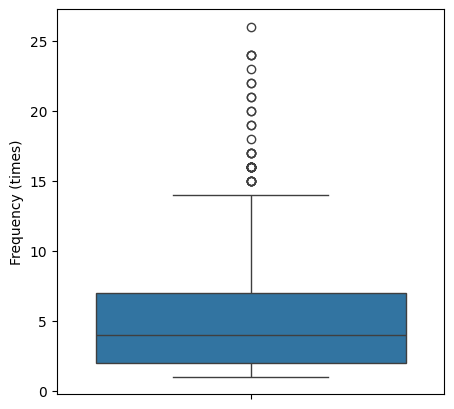

In [21]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y="Frequency (times)")
plt.show()


In [22]:
df["Monetary (c.c. blood)"].describe()


count     732.000000
mean     1291.666667
std      1127.464115
min       250.000000
25%       500.000000
50%      1000.000000
75%      1750.000000
max      6500.000000
Name: Monetary (c.c. blood), dtype: float64

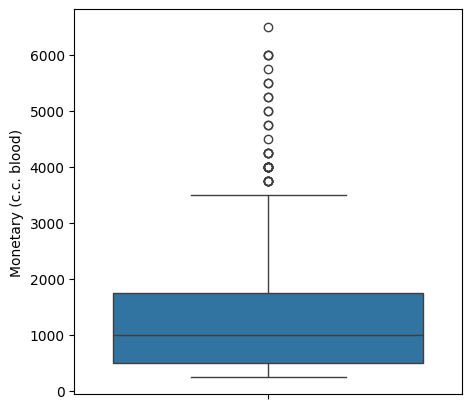

In [23]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y="Monetary (c.c. blood)")
plt.show()

In [25]:
df["Monetary (c.c. blood)"].quantile([0.5,0.7,0.9,0.95,0.99])

0.50    1000.0
0.70    1500.0
0.90    2750.0
0.95    3612.5
0.99    5250.0
Name: Monetary (c.c. blood), dtype: float64

In [26]:
df["Time (months)"].describe()

count    732.000000
mean      33.439891
std       23.692177
min        2.000000
25%       16.000000
50%       28.000000
75%       48.000000
max       98.000000
Name: Time (months), dtype: float64

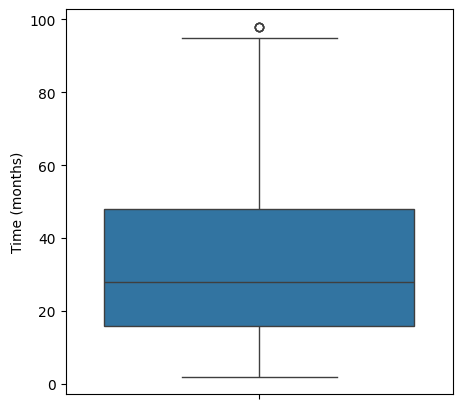

In [27]:
plt.figure(figsize=[5,5])
sns.boxplot(data=df,y="Time (months)")
plt.show()

In [28]:
df["Time (months)"].quantile([0.5,0.7,0.9,0.95,0.99])


0.50    28.00
0.70    41.70
0.90    71.00
0.95    79.00
0.99    94.38
Name: Time (months), dtype: float64

<Figure size 800x600 with 0 Axes>

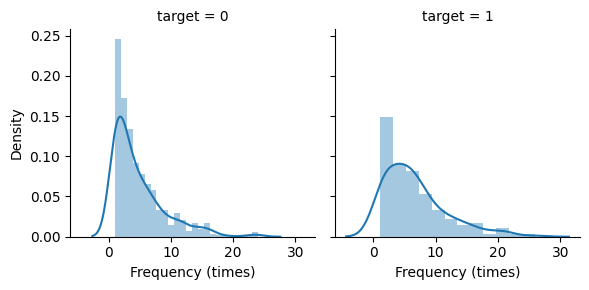

In [29]:
fig = plt.figure(figsize=(8,6))
g = sns.FacetGrid(df, col='target')
g.map(sns.distplot, "Frequency (times)")
plt.show()

<Figure size 800x600 with 0 Axes>

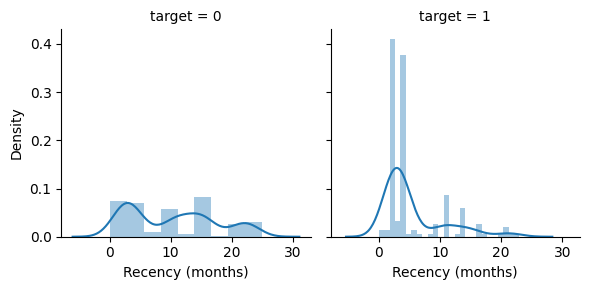

In [30]:
fig = plt.figure(figsize=(8,6))
g = sns.FacetGrid(df, col='target')
g.map(sns.distplot, "Recency (months)")
plt.show()

<Figure size 800x600 with 0 Axes>

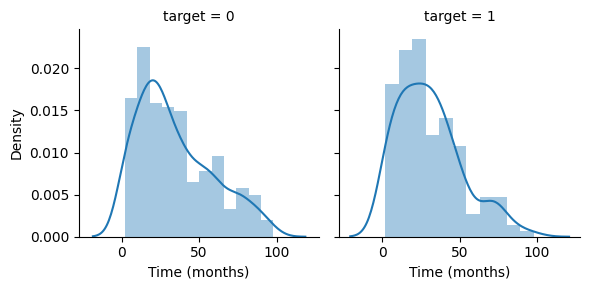

In [31]:
fig = plt.figure(figsize=(8,6))
g = sns.FacetGrid(df, col='target')
g.map(sns.distplot, "Time (months)")
plt.show()

<Figure size 800x600 with 0 Axes>

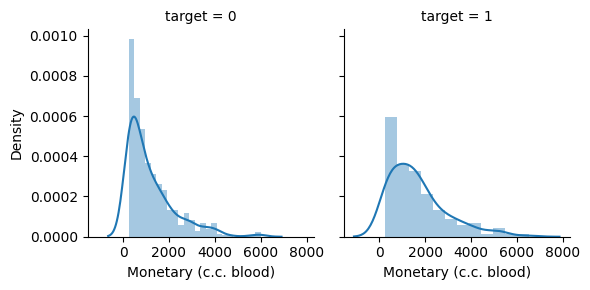

In [32]:
fig = plt.figure(figsize=(8,6))
g = sns.FacetGrid(df, col='target')
g.map(sns.distplot, "Monetary (c.c. blood)")
plt.show()

In [33]:
X_Data = df.drop(columns='target')
X_Data.head(2)


,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
1,0,13,3250,28
2,1,16,4000,35


In [34]:

Y_Data = df.target
Y_Data.head(2)

1    1
2    1
Name: target, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_Data,Y_Data,test_size=0.3,random_state=0,stratify=df.target)


In [36]:
X_train.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
729,23,3,750,39
584,2,1,250,2
369,16,5,1250,40
461,21,1,250,21
258,4,3,750,28


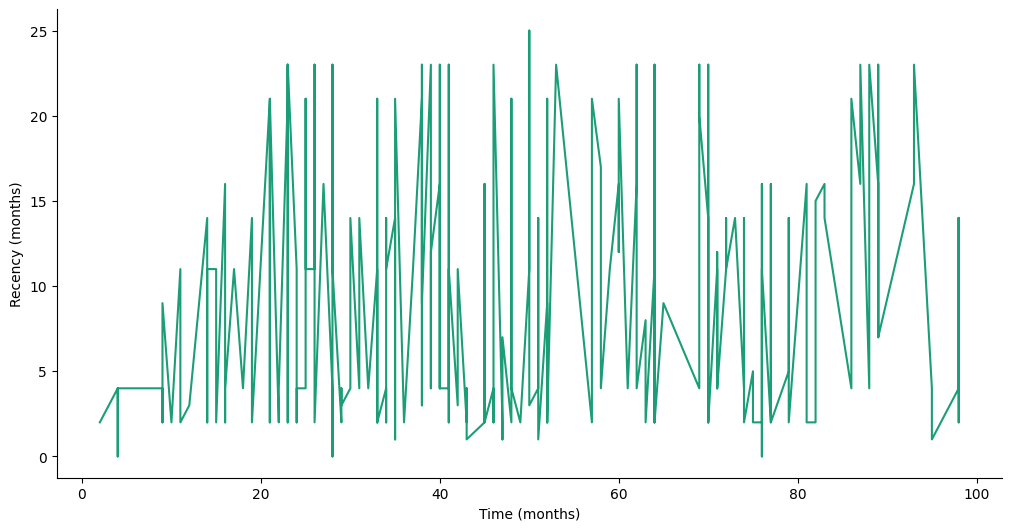

In [55]:
# @title Time (months) vs Recency (months)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Time (months)']
  ys = series['Recency (months)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = X_train.sort_values('Time (months)', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Time (months)')
_ = plt.ylabel('Recency (months)')

In [37]:
# Instantiate TPOTClassifier
tpot = TPOTClassifier(
    generations=5, #number of iterations to run ; pipeline optimisation process ; by default value is 100
    population_size=20, #number of individuals to retrain in the genetic programing popluation in every generation, by default value is 100
    verbosity=2, #it will state how much info TPOT will communicate while it is running
    scoring='roc_auc', #use to evaluate the quality of given pipeline
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
tpot.fit(X_train, y_train)

# AUC score for tpot model
tpot_auc_score = roc_auc_score(y_test, tpot.predict_proba(X_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')

# Print best pipeline steps
print('\nBest pipeline steps:', end='\n')
for idx, (name, transform) in enumerate(tpot.fitted_pipeline_.steps, start=1):
    # Print idx and transform
    print(f'{idx}. {transform}')


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7527297684734394

Generation 2 - Current best internal CV score: 0.7527297684734394

Generation 3 - Current best internal CV score: 0.7527297684734394

Generation 4 - Current best internal CV score: 0.7527297684734394

Generation 5 - Current best internal CV score: 0.7527297684734394

Best pipeline: LogisticRegression(GaussianNB(input_matrix), C=25.0, dual=False, penalty=l2)

AUC score: 0.7368

Best pipeline steps:
1. StackingEstimator(estimator=GaussianNB())
2. LogisticRegression(C=25.0, random_state=42)


In [38]:
tpot.fitted_pipeline_

Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=GaussianNB())),
                ('logisticregression',
                 LogisticRegression(C=25.0, random_state=42))])

In [39]:
col_norm = ["Monetary (c.c. blood)"]

# Copy X_train and X_test into X_train_normed and X_test_normed
X_train_normed, X_test_normed = X_train.copy(), X_test.copy()

# Log normalization
for df_norm in [X_train_normed, X_test_normed]:
    # Add log normalized column
    df_norm['log_monetary'] = np.log(df_norm[col_norm])
    # Drop the original column
    df_norm.drop(columns=col_norm, inplace=True)

In [40]:
# Comparing the values for X_train and X_train_normed
print("X_train Value\n")
print(X_train.head())
print("------------------------")
print("X_train_normed Value\n")
print(X_train_normed.head())


X_train Value

     Recency (months)  Frequency (times)  Monetary (c.c. blood)  Time (months)
729                23                  3                    750             39
584                 2                  1                    250              2
369                16                  5                   1250             40
461                21                  1                    250             21
258                 4                  3                    750             28
------------------------
X_train_normed Value

     Recency (months)  Frequency (times)  Time (months)  log_monetary
729                23                  3             39      6.620073
584                 2                  1              2      5.521461
369                16                  5             40      7.130899
461                21                  1             21      5.521461
258                 4                  3             28      6.620073


In [41]:
# Comparing the variance for X_train and X_train_normed
print("X_train Variance\n")
print(X_train.var().round(2))
print("------------------------")
print("X_train_normed Variance\n")
print(X_train_normed.var().round(2))

X_train Variance

Recency (months)              49.46
Frequency (times)             20.88
Monetary (c.c. blood)    1304826.77
Time (months)                591.75
dtype: float64
------------------------
X_train_normed Variance

Recency (months)      49.46
Frequency (times)     20.88
Time (months)        591.75
log_monetary           0.79
dtype: float64


In [42]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=25.0, random_state=42)
# Train the model
logreg.fit(X_train_normed, y_train)

LogisticRegression(C=25.0, random_state=42)

In [44]:
!pip install scikit-learn

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [46]:
print(logreg.feature_names_in_)
print(X_test.columns)

['Recency (months)' 'Frequency (times)' 'Time (months)' 'log_monetary']
Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)'],
      dtype='object')


In [49]:
# AUC score for tpot model
logreg_auc_score = roc_auc_score(y_test, logreg.predict_proba(X_test_normed)[:, 1])
print(f'\nAUC score: {logreg_auc_score:.4f}')


AUC score: 0.7494


In [50]:

# Importing itemgetter
from operator import itemgetter

# Sort models based on their AUC score from highest to lowest
sorted(
    [('tpot', tpot_auc_score), ('logreg', logreg_auc_score)],
    key=itemgetter(1),
    reverse=True)

[('logreg', 0.7494488919828287), ('tpot', 0.7368024132730016)]

In [51]:
import pickle

# Saving model to disk
pickle.dump(logreg, open('model.pkl','wb'))

# Loading model to compare the results
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict([[9, 3, 750, 52]]))



[1]


In [52]:
X_test.head()

,Recency (months),Frequency (times),log_monetary,Time (months)
388,9,3,750,52
118,1,7,1750,57
176,11,4,1000,16
429,16,3,750,40
277,4,3,750,34


In [54]:
print(model.predict([[1,7,1750,57]]))

[0]
